In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Load your data
data = pd.read_csv("Spotify_Popularity_data.csv")
data.head(15)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5hR6lVUp1JyTrxzihXTvZJ,"Pritam, Papon, Varun Grover","Nazar Teri Toofan (From ""Merry Christmas"")","Nazar Teri Toofan (From ""Merry Christmas"")",Medium,243610,False,0.462,0.628,2,-6.702,1,0.0443,0.2350,0.000000,0.0822,0.252,117.202,4
1,2kPXVr1Sr8hoCv7g41WCuS,"Pritam, Diljit Dosanjh, Kumaar","Banda (From ""Dunki"")","Banda (From ""Dunki"")",Medium,168861,False,0.869,0.746,9,-6.572,1,0.2310,0.1420,0.000000,0.3200,0.609,127.087,4
2,5qMvYzgquX6SnugWREFj6e,"Pritam, Ash King, Varun Grover","Merry Christmas (Title Track) (From ""Merry Chr...","Merry Christmas (Title Track) (From ""Merry Chr...",Medium,152000,False,0.682,0.638,0,-7.158,0,0.0321,0.5440,0.000000,0.1780,0.821,105.063,4
3,0VXBujZKMLLlmee25BXEQs,"Vishal-Shekhar, Vishal Dadlani, Shekhar Ravjia...","Sher Khul Gaye (From ""Fighter"")","Sher Khul Gaye (From ""Fighter"")",High,180172,False,0.880,0.630,0,-6.719,0,0.0606,0.0219,0.000000,0.0663,0.810,123.021,4
4,1XMQPTzIjDiPUK0siiavXi,Shane Stephen,Meri Ye Raahein,Meri Ye Raahein,Low,273488,False,0.390,0.262,5,-13.751,1,0.0379,0.6910,0.000005,0.1310,0.479,82.168,4
5,79hfXFxxw7rQVp0HVvhutu,"Shide Boss, Mazza On The Track",Swing My Way (Sohniye),Swing My Way (Sohniye),Medium,128813,False,0.760,0.477,5,-9.666,0,0.1030,0.3480,0.000000,0.1490,0.567,96.988,4
6,5e8LGG7AenfzV7Yq44wbkZ,Yohan Marshall,Jo Tu Mere Paas Hai,Jo Tu Mere Paas Hai,Medium,152470,False,0.656,0.574,1,-6.653,1,0.0298,0.2890,0.000002,0.0828,0.504,84.996,4
7,4xwg5YtbpLLTkWhDz36txl,"लोफी.देसी, Pritam Pyaar","Lutt Putt Gaya (From ""Dunki"")","Lutt Putt Gaya (From ""Dunki"") - Acoustic Version",Low,84142,False,0.691,0.118,2,-14.061,1,0.0661,0.8570,0.000000,0.1260,0.513,90.144,4
8,5gr25T51b11HpK72jGjmcC,Prismin,Barsaat,Barsaat,Medium,192014,False,0.619,0.372,5,-13.115,1,0.0307,0.2270,0.000000,0.1690,0.369,100.070,4
9,5pc00zSB3KitNNdbUq0nck,"Prashanthi Sankaran, Marcus Schinkel, Maren Lu...",Shri Ipanema,Shri Ipanema,Low,187086,False,0.637,0.448,8,-8.201,1,0.0496,0.7010,0.000015,0.1480,0.398,126.947,4


In [3]:
## Removing Track_Id, Artists, Album_Name, Track_Name
remove_cols = ['track_id','artists','album_name','track_name','explicit']
data.drop(remove_cols,axis=1, inplace=True)
data.head(15)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Medium,243610,0.462,0.628,2,-6.702,1,0.0443,0.2350,0.000000,0.0822,0.252,117.202,4
1,Medium,168861,0.869,0.746,9,-6.572,1,0.2310,0.1420,0.000000,0.3200,0.609,127.087,4
2,Medium,152000,0.682,0.638,0,-7.158,0,0.0321,0.5440,0.000000,0.1780,0.821,105.063,4
3,High,180172,0.880,0.630,0,-6.719,0,0.0606,0.0219,0.000000,0.0663,0.810,123.021,4
4,Low,273488,0.390,0.262,5,-13.751,1,0.0379,0.6910,0.000005,0.1310,0.479,82.168,4
5,Medium,128813,0.760,0.477,5,-9.666,0,0.1030,0.3480,0.000000,0.1490,0.567,96.988,4
6,Medium,152470,0.656,0.574,1,-6.653,1,0.0298,0.2890,0.000002,0.0828,0.504,84.996,4
7,Low,84142,0.691,0.118,2,-14.061,1,0.0661,0.8570,0.000000,0.1260,0.513,90.144,4
8,Medium,192014,0.619,0.372,5,-13.115,1,0.0307,0.2270,0.000000,0.1690,0.369,100.070,4
9,Low,187086,0.637,0.448,8,-8.201,1,0.0496,0.7010,0.000015,0.1480,0.398,126.947,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        233 non-null    object 
 1   duration_ms       233 non-null    int64  
 2   danceability      233 non-null    float64
 3   energy            233 non-null    float64
 4   key               233 non-null    int64  
 5   loudness          233 non-null    float64
 6   mode              233 non-null    int64  
 7   speechiness       233 non-null    float64
 8   acousticness      233 non-null    float64
 9   instrumentalness  233 non-null    float64
 10  liveness          233 non-null    float64
 11  valence           233 non-null    float64
 12  tempo             233 non-null    float64
 13  time_signature    233 non-null    int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 25.6+ KB


In [5]:
# Select only numeric columns for normalization
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Min-Max normalization
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [6]:
data['popularity'].value_counts()


Medium    134
Low        74
High       25
Name: popularity, dtype: int64

<Axes: xlabel='popularity', ylabel='count'>

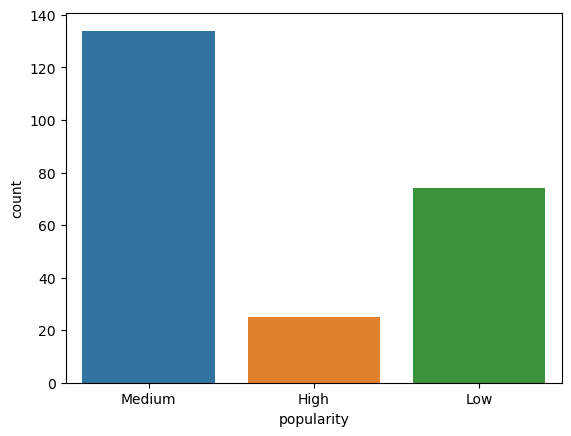

In [7]:
sns.countplot(x=data['popularity'])

In [8]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming you have your data stored in a pandas DataFrame called df
# and your target variable (label column) is named 'popularity'

# Separate features and target variable
X = data.drop('popularity', axis=1)  # Assuming 'popularity' is the target variable
y = data['popularity']

# Instantiate SMOTE
smote = SMOTE()

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Concatenate resampled features and target variable into a new DataFrame
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Print the value counts of the target variable after oversampling
print(df_resampled['popularity'].value_counts())


Medium    134
High      134
Low       134
Name: popularity, dtype: int64


In [9]:
data.head(15)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Medium,0.641336,0.384615,0.601885,0.181818,0.684436,1.0,0.051980,0.239666,0.000000,0.079596,0.235730,0.343655,0.75
1,Medium,0.380236,0.924403,0.740872,0.818182,0.692745,1.0,0.565457,0.143460,0.000000,0.455148,0.619478,0.421839,0.75
2,Medium,0.321341,0.676393,0.613663,0.000000,0.655289,0.0,0.018427,0.559316,0.000000,0.230891,0.847361,0.247643,0.75
3,High,0.419746,0.938992,0.604240,0.000000,0.683349,0.0,0.096810,0.019220,0.000000,0.054485,0.835537,0.389680,0.75
4,Low,0.745701,0.289125,0.170789,0.454545,0.233877,1.0,0.034378,0.711383,0.000006,0.156665,0.479738,0.066558,0.75
5,Medium,0.240348,0.779841,0.424028,0.454545,0.494982,0.0,0.213421,0.356561,0.000000,0.185092,0.574331,0.183775,0.75
6,Medium,0.322982,0.641910,0.538280,0.090909,0.687568,1.0,0.012101,0.295527,0.000002,0.080543,0.506611,0.088925,0.75
7,Low,0.084311,0.688329,0.001178,0.181818,0.214062,1.0,0.111936,0.883105,0.000000,0.148768,0.516285,0.129643,0.75
8,Medium,0.461110,0.592838,0.300353,0.454545,0.274529,1.0,0.014576,0.231390,0.000000,0.216677,0.361496,0.208151,0.75
9,Low,0.443897,0.616711,0.389870,0.727273,0.588623,1.0,0.066557,0.721728,0.000017,0.183512,0.392669,0.420732,0.75


In [51]:
data['popularity'].value_counts()

Medium    134
Low        74
High       25
Name: popularity, dtype: int64

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [11]:
X_train

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
109,0.562820,0.812997,0.555948,0.000000,0.548226,0.0,0.039879,0.696901,0.005663,0.333544,0.778566,0.247034,0.75
17,0.383118,0.748011,0.683157,0.090909,0.622435,0.0,0.044554,0.115529,0.000016,0.185092,0.379770,0.246939,0.75
265,0.790728,0.560986,0.344030,0.894917,0.518565,0.0,0.025455,0.893060,0.000007,0.087117,0.382590,0.281377,0.75
24,0.288513,0.586207,0.628975,0.363636,0.655992,0.0,0.014576,0.333802,0.000079,0.565698,0.537784,0.650183,0.75
175,0.507264,0.413793,0.409894,0.363636,0.502717,1.0,0.032453,0.897588,0.042716,0.121920,0.506611,0.808379,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.398708,0.513263,0.759717,0.909091,0.835602,1.0,0.018152,0.488973,0.000000,0.082912,0.676448,0.270968,0.75
106,0.355139,0.742706,0.193168,1.000000,0.315692,1.0,0.095435,0.904829,0.000012,0.142451,0.189509,0.587668,0.75
270,0.419783,0.661422,0.717589,0.190535,0.768183,1.0,0.178109,0.206534,0.003541,0.117496,0.516344,0.168163,0.75
348,0.572095,0.479101,0.328996,0.168088,0.504188,0.0,0.018521,0.426892,0.000028,0.187506,0.279084,0.368825,0.75


In [12]:
y_train

109    Medium
17       High
265      High
24        Low
175    Medium
        ...  
71     Medium
106    Medium
270      High
348       Low
102    Medium
Name: popularity, Length: 281, dtype: object

<Axes: xlabel='popularity', ylabel='count'>

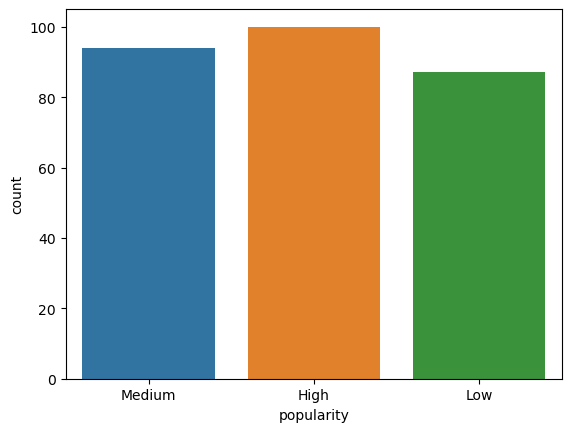

In [13]:
sns.countplot(x=y_train)

In [14]:
X_test

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
285,0.759660,0.195747,0.341531,0.095955,0.713587,1.0,0.011687,0.766103,0.000000,0.229212,0.491692,0.152333,0.537697
281,0.693191,0.796787,0.798364,0.727378,0.758780,0.0,0.043429,0.057529,0.002593,0.192872,0.662147,0.334242,0.750000
33,0.605858,0.588859,0.650177,0.090909,0.675871,1.0,0.026128,0.577937,0.000000,0.229311,0.475438,0.341844,0.750000
211,0.638867,0.785146,0.421673,0.454545,0.539789,1.0,0.073157,0.117598,0.000000,0.117183,0.672149,0.152003,0.750000
93,0.297169,0.685676,0.388693,0.000000,0.522084,1.0,0.000000,0.851037,0.000200,0.131396,0.297001,0.303017,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.884311,0.551724,0.195524,0.727273,0.303420,1.0,0.030253,0.889312,0.000000,0.140872,0.270128,0.065577,0.750000
286,0.388568,0.716959,0.658294,0.286567,0.765762,1.0,0.180686,0.124234,0.000013,0.108654,0.558304,0.171309,0.750000
358,0.462997,0.671700,0.520091,0.505890,0.586837,1.0,0.078086,0.724771,0.000752,0.104697,0.653307,0.444050,0.750000
382,0.467409,0.592308,0.252626,0.497050,0.354544,1.0,0.025896,0.843192,0.000000,0.132735,0.601325,0.255851,0.750000


In [15]:
y_test

285      High
281      High
33       High
211    Medium
93     Medium
        ...  
79     Medium
286      High
358       Low
382       Low
157    Medium
Name: popularity, Length: 121, dtype: object

In [48]:
alpha_value = 0.  # Example value for the smoothing parameter alpha

# Initialize and train the Multinomial Naive Bayes model with hyperparameters
naive_bayes = MultinomialNB(alpha=alpha_value)  # Specify alpha parameter
naive_bayes.fit(X_train, y_train)

MultinomialNB(alpha=0.8)

In [49]:
# Generate classification report
report1 = classification_report(y_train, y_train_pred)
report2 = classification_report(y_test, y_test_pred)

# Print the classification report
print(report1)
print(report2)

              precision    recall  f1-score   support

        High       0.43      0.79      0.56       100
         Low       0.47      0.32      0.38        87
      Medium       0.59      0.24      0.35        94

    accuracy                           0.46       281
   macro avg       0.50      0.45      0.43       281
weighted avg       0.50      0.46      0.43       281

              precision    recall  f1-score   support

        High       0.35      0.85      0.50        34
         Low       0.57      0.26      0.35        47
      Medium       0.53      0.23      0.32        40

    accuracy                           0.41       121
   macro avg       0.48      0.44      0.39       121
weighted avg       0.50      0.41      0.38       121



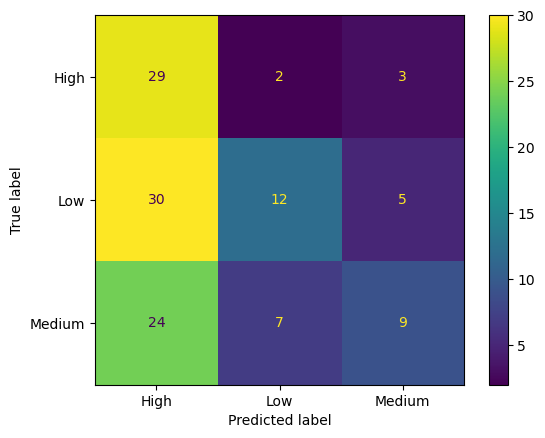

Confusion Matrix: 
 [[29  2  3]
 [30 12  5]
 [24  7  9]]


In [53]:

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred, labels=naive_bayes.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=naive_bayes.classes_)
disp.plot()
plt.show()
print(f"Confusion Matrix: \n {cm}")